In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load processedData CSV onto cpiIndexTable dataframe
cpiIndexTable= pd.read_csv("C:/Users/Spring Boots/Desktop/App/Pandas-NumPy/processedData.csv")
cpiIndexTable.head()

#Find & Delete NaN value
dataNull=cpiIndexTable.isnull().sum()
plt.rcParams["figure.figsize"] = (2,2)
plt.rcParams["figure.dpi"] = 144

#Load realEstateIndex CSV onto houseIndexTable dataframe
houseIndexTable=pd.read_csv("C:/Users/Spring Boots/Desktop/App/Pandas-NumPy/realEstateIndex.csv")
houseIndexTable.head()

,GEO,YEAR,MONTH,HOUSE,LAND
0,Atlantic Region,2018,1,100.3,99.9E
1,Atlantic Region,2018,2,100.3,99.9E
2,Atlantic Region,2018,3,100.5,100.0E
3,Atlantic Region,2018,4,100.6,100.0E
4,Atlantic Region,2018,5,100.5,100.0E


#### Yearly *CPI* by Month

In [451]:
#group sortonGEO set on PROV_INDEX, then PRODUCT, then YEAR into DataFrameGroupBy object
sortonCPI=cpiIndexTable.groupby(['PROV_INDEX','MONTH'])
#concatenate each group and reset index
procCPITable = pd.concat([group for _, group in sortonCPI])
#reset Index for each group
procCPITable = procCPITable.reset_index(drop=True)
procCPITable['CPI_NXTYR']=None 
#set CPI_NXTYR based on the sortonGEO 
maskCPI=procCPITable['YEAR']!=2024
procCPITable.loc[maskCPI, 'CPI_NXTYR']= procCPITable['CURR_CPI'].shift(-1)
#calc PERC_CHANGE
procCPITable['PERC_CHANGE']=0
#set boolean on YEAR==2002
maskData=procCPITable['YEAR']!=2002
#apply bool to df procCPITable
procCPITable.loc[maskData, 'PERC_CHANGE']= ((procCPITable['CURR_CPI'] - procCPITable['CURR_CPI'].shift(1)) / procCPITable['CURR_CPI'].shift(1)) * 100
#round calulcated PERC_CHANGE to 1 s.f
procCPITable['PERC_CHANGE']=procCPITable['PERC_CHANGE'].round(1)

procCPITable.head()

C:\Users\Spring Boots\AppData\Local\Temp\ipykernel_16620\550937008.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.80321285  0.99601594  0.         ...  5.07246377 11.53605016
  3.87858347]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  procCPITable.loc[maskData, 'PERC_CHANGE']= ((procCPITable['CURR_CPI'] - procCPITable['CURR_CPI'].shift(1)) / procCPITable['CURR_CPI'].shift(1)) * 100


,PROV_INDEX,REF_DATE,GEO,YEAR,MONTH,ALL,BAKERY,DAIRY,EGGS,FISH,FRUITS,MEAT,MISC,VEG,CURR_CPI,CPI_NXTYR,PERC_CHANGE
0,1,2002/01/01 06:00:00+00,Alberta,2002,1,99.9,98.7,98.4,97.5,98.4,104.1,99.3,100.8,99.6,99.6,100.4,0.0
1,1,2003/01/01 06:00:00+00,Alberta,2003,1,101.0,103.1,101.0,99.8,99.8,96.4,100.8,102.9,99.1,100.4,101.4,0.8
2,1,2004/01/01 06:00:00+00,Alberta,2004,1,102.1,103.2,103.4,104.9,97.8,98.2,98.3,107.6,97.2,101.4,101.4,1.0
3,1,2005/01/01 06:00:00+00,Alberta,2005,1,102.6,108.4,103.8,107.4,93.8,93.4,103.8,105.9,93.5,101.4,104.3,0.0
4,1,2006/01/01 06:00:00+00,Alberta,2006,1,105.0,108.8,110.0,111.8,93.8,97.2,102.7,107.8,101.2,104.3,109.0,2.9


#### INNER JOIN on df *houseIndexTable* & *procCPITable*

In [452]:
#strip whitespaces from procCPITable object columns
for col in procCPITable.columns:
    if procCPITable[col].dtype == 'object':
        procCPITable[col] = procCPITable[col].astype(str).str.strip()

#strip whitespaces from houseIndexTable object columns
for col in houseIndexTable.columns:
    if houseIndexTable[col].dtype == 'object':
        houseIndexTable[col] = houseIndexTable[col].astype(str).str.strip()

#merge houseIndexTable & procCPITable on GEO, YEAR, MONTH        
sortonGEO = pd.merge(houseIndexTable, procCPITable, on=['GEO', 'YEAR', 'MONTH'], how='inner')
sortonGEO.dropna()

,GEO,YEAR,MONTH,HOUSE,LAND,PROV_INDEX,REF_DATE,ALL,BAKERY,DAIRY,EGGS,FISH,FRUITS,MEAT,MISC,VEG,CURR_CPI,CPI_NXTYR,PERC_CHANGE
0,British Columbia,2018,1,108.7,104.7E,2,2018/01/01 06:00:00+00,137.5,142.0,132.9,134.7,134.9,138.6,145.1,128.7,143.2,137.5,141.8,2.0
1,British Columbia,2018,2,108.7,104.7E,2,2018/02/01 06:00:00+00,137.6,142.7,132.4,137.2,132.8,136.7,147.3,127.8,146.0,137.8,142.4,1.5
2,British Columbia,2018,3,108.9,104.8E,2,2018/03/01 06:00:00+00,136.4,140.9,131.5,136.7,134.1,136.0,147.1,127.2,140.5,136.7,143.4,0.9
3,British Columbia,2018,4,108.9,104.8E,2,2018/04/01 05:00:00+00,137.3,141.7,131.1,135.4,137.8,138.8,149.2,127.8,139.7,137.6,142.2,1.0
4,British Columbia,2018,5,108.9,104.8E,2,2018/05/01 05:00:00+00,137.1,142.0,132.5,137.0,136.6,139.1,148.2,126.2,140.6,137.7,142.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Quebec,2023,11,149.3,121.4E,9,2023/11/01 05:00:00+00,181.3,193.6,154.4,198.5,158.9,170.8,217.3,169.3,179.3,180.4,100.4,3.4
221,Quebec,2023,12,149.3,121.4E,9,2023/12/01 06:00:00+00,182.3,192.2,153.6,195.1,158.5,174.1,218.8,171.1,181.2,180.8,100.9,4.1
222,Quebec,2024,1,148.8,122.0E,9,2024/01/01 06:00:00+00,182.9,190.5,152.6,201.6,159.4,176.4,217.8,172.8,183.8,182.0,None,3.2
223,Quebec,2024,2,149.4,122.0E,9,2024/02/01 06:00:00+00,182.8,189.6,153.4,200.0,159.6,169.6,216.2,172.9,191.7,181.8,None,2.1


#### correlation matrix: *HOUSE, LAND, CURR_CPI, PERC_CHANGE*

In [453]:
# sortonGEO['LAND'] = sortonGEO['LAND'].str.replace('E','').astype(float)
colofInterest=['LAND', 'CURR_CPI', 'HOUSE']
print(sortonGEO[colofInterest].describe())



             LAND    CURR_CPI       HOUSE
count  225.000000  225.000000  225.000000
mean   112.634222  158.303556  119.782667
std      7.223927   15.074079   14.953861
min    100.600000  136.700000  101.600000
25%    106.400000  146.400000  106.100000
50%    111.400000  153.000000  116.800000
75%    120.300000  172.100000  128.300000
max    122.300000  190.000000  150.500000


GEO             object
YEAR             int64
MONTH            int64
HOUSE          float64
LAND           float64
PROV_INDEX       int64
REF_DATE        object
ALL            float64
BAKERY         float64
DAIRY          float64
EGGS           float64
FISH           float64
FRUITS         float64
MEAT           float64
MISC           float64
VEG            float64
CURR_CPI       float64
CPI_NXTYR       object
PERC_CHANGE    float64
dtype: object


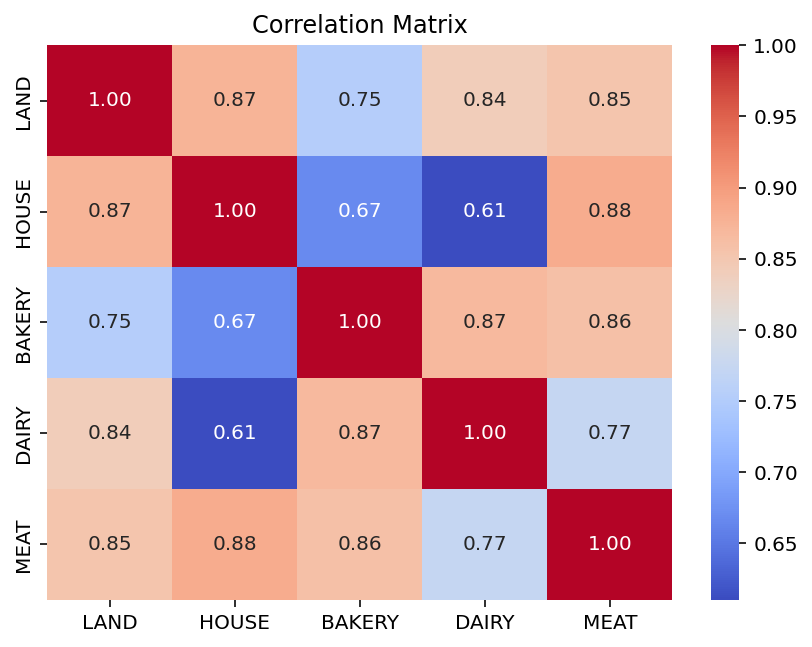

In [454]:
#correlation matrix on 'LAND','PERC_CHANGE','BAKERY','DAIRY', 'EGGS','MISC','MEAT'
corRelation= ['LAND','HOUSE','BAKERY','DAIRY','MEAT']
corRelationMatrix=sortonGEO[corRelation].corr()
print(sortonGEO.dtypes)

#plot corRelationMatrix
plt.figure(figsize=(7, 5))
sns.heatmap(corRelationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

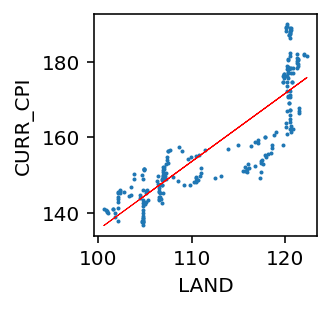

In [471]:
#fit data in Linear regression Model for Land vs CURR_CPI
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(sortonGEO[["LAND"]], sortonGEO["CURR_CPI"])
sortonGEO.plot.scatter("LAND", "CURR_CPI", s=1)
plt.plot(sortonGEO["LAND"], lr.predict(sortonGEO[["LAND"]]), "red", linewidth=0.5)

In [456]:
print(f"WEIGHT:{lr.coef_[0]:.2f}")
print(f"BIAS:{lr.intercept_:.2f}")

WEIGHT:1.74
BIAS:-49.67


In [457]:
import numpy as np 
PREDICTORS = ['BAKERY','DAIRY', 'EGGS','MISC','MEAT', 'CURR_CPI']
TARGET = "LAND"

# 
np.random.seed(1)

split_data = np.split(sortonGEO, [int(.7 * len(sortonGEO)), int(.85 * len(sortonGEO))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(),
                                                            d[[TARGET]].to_numpy()]
                                                            for d in split_data]


c:\Users\Spring Boots\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [458]:
import math

def init_params(predictors):

    # k scaling factor : reduce weights and biases 
    k = math.sqrt(1 / predictors)
    # set random seed to 0
    np.random.seed(1)
    weights = np.random.uniform(1.50 * k, 2.0 * k, size=(predictors, 1))
    # weights = np.random.rand(predictors, 1) * 2 * k - k
    biases = np.ones((1, 1)) * 2 * k - k
    return  [weights, biases]


In [459]:
#forward calculates predicted values for LAND based on 'BAKERY','DAIRY', 'EGGS','MISC','MEAT', 'CURR_CPI'
def forward(params, x):
    weights, biases = params
    prediction = np.log(x) @ weights + biases
    return prediction

def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    # The derivative of mean squared error
    return predicted - actual 

def backward(params, x, lr, grad):
    # Multiply the gradient by the x values
    # Divide x by the number of rows in x to avoid updates that are too large
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params


In [460]:
lr = 1e-7
epochs =80000
params = init_params(train_x.shape[1])

# Store weights and gradients so we can visualize

sample_rate = 100
samples = int(epochs / sample_rate)
historical_ws = np.zeros((samples, train_x.shape[1]))
historical_gradient = np.zeros((samples,))

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    # Store historical weights for visualization
    if i % sample_rate == 0:
        index = int(i / sample_rate)
        historical_gradient[index] = np.mean(grad)
        historical_ws[index,:] = params[0][:,0]

    # Display validation loss
    if i % 10000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} validation loss: {valid_loss}")

Epoch 0 validation loss: 7215.879496608304
Epoch 10000 validation loss: 43.64454329324792
Epoch 20000 validation loss: 51.62544811998478
Epoch 30000 validation loss: 51.69143907378708
Epoch 40000 validation loss: 51.69450037452127
Epoch 50000 validation loss: 51.697089714100514
Epoch 60000 validation loss: 51.6996763595138
Epoch 70000 validation loss: 51.702263832240355


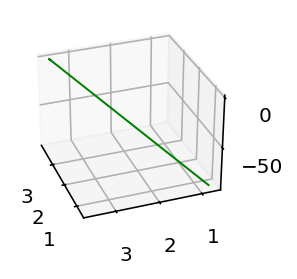

In [472]:
import matplotlib.pyplot as plt

# Create a figure and a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(30,160)

# Plot the path of the optimization algorithm
ax.plot3D(historical_ws[:,0], historical_ws[:,1], historical_gradient, 'green', linewidth=1, zorder=50)

# Show the plot
plt.show()